# Avacado Project
### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#### Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

#### Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
# Importing required libraries

#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
#  Importing dataset

df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Column observation
*  **Unnamed** - This is an irrelveant column containing the index or serial number of the rows we might drop it
*  **Date** - This is Object type of column containing the date of observation'
*  **AveragePrice** - This is intger type of column containing the average price per piece in USD
*  **Total Volume** - This is also an integer type of column showing the number of units or acacados sold
*  **4046/4225/4770** - This columns indicates the PLU numbers assigned to a avacado based on its size
*  **Total bags** - This column is of integer type and indicates the total number of bags sold
*  **Small Bags** - This column is of integer type and indicates the total number of small bags sold
*  **Large Bags** - This column is of integer type and indicates the total number of large bags sold
*  **XLarge Bags** - This column is of integer type and indicates the total number of extra large bags sold
*  **Type** - This column is of Object type and indicates type of Avacado ( conventional or Organic)
*  **Year** - This is integer type of column showing Year of observation
*  **Region** - The city or the region of observation

In [3]:
# Dropping first column as it is an irrelveant column containing the index or serial number
df.drop('Unnamed: 0', axis=1, inplace = True)

In [4]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


* Here we have **18249 rows and 13 diffrent columns** in our datset.

In [6]:
# Checking for null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
# Checking for duplicate calues
df.duplicated().sum()

0

In [8]:
# Checking data Stats
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
# Chacking for correlation
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


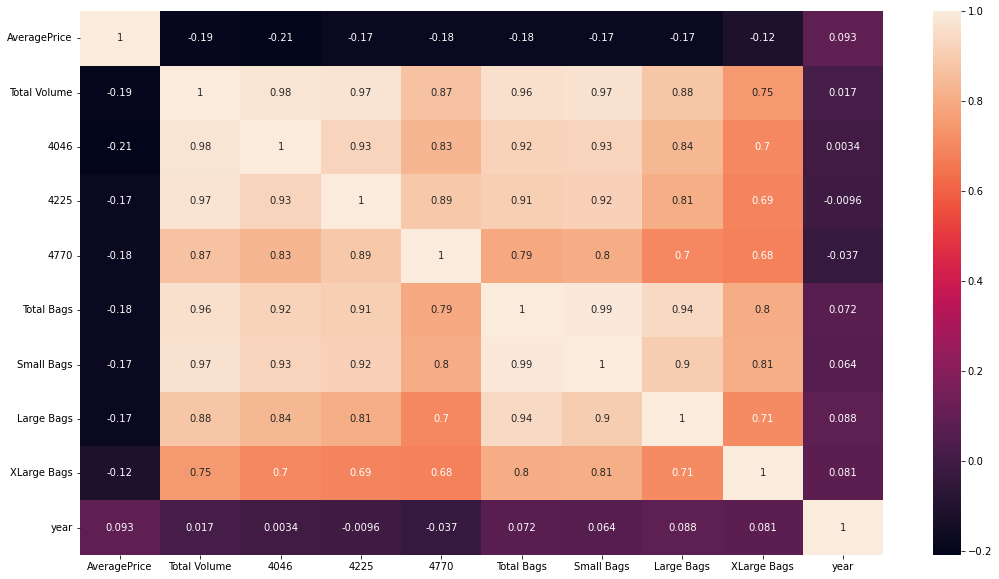

In [10]:
plt.figure(figsize= (18,10))
sns.heatmap(df.corr(),annot =True )
plt.show()

* **Since Total bags column represents the sum of small/ large and extra large bags high correlation exists between this columns.**

* **Also Total volume represents the cumulated sell in units of all sizes of Avacados this 4 columns also shws high correlation.**

In [11]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

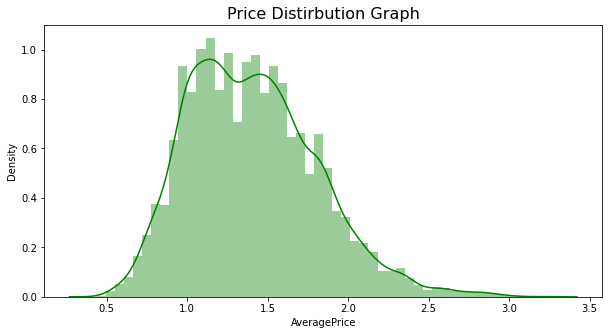

In [12]:
plt.figure(figsize=(10,5))
plt.title("Price Distirbution Graph",fontsize=16)
ax = sns.distplot(df["AveragePrice"], color = 'g')

* **Here we found that Average price ranges from 0.5 to 2.5 and has mean 1.40.**

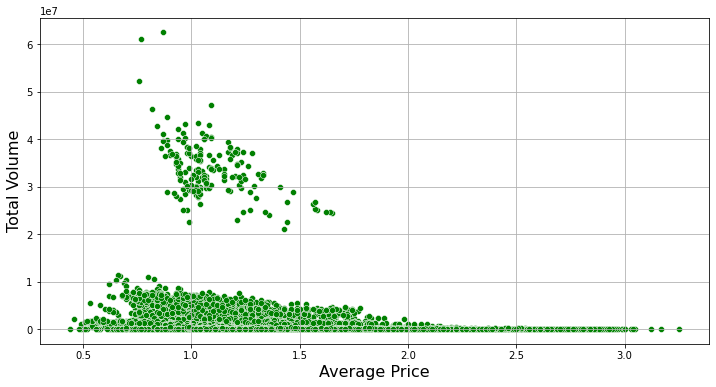

In [13]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Total Volume', x = 'AveragePrice', data  = df, color = 'g')
plt.xlabel('Average Price',fontsize=16)
plt.ylabel('Total Volume',fontsize=16)
plt.grid()
plt.show()

* **Above graph shows that more volume was sold for price range 0.5 to 1.8**
* **Total volume is denced between 0 to 1 and 3 to 4**

In [14]:
# Splitting date column between days and month
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [15]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13


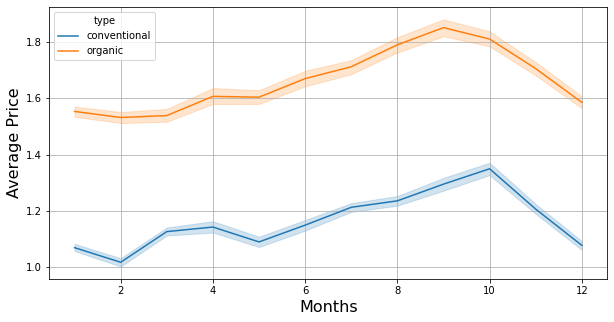

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.xlabel('Months',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.grid()
plt.show()

* **Here we can see that avg price for both type of Avacados increases from 6 to 12 month.**
* **Also avg price for Organic Avacados is greater than Conventional Avacados.**

conventional    9126
organic         9123
Name: type, dtype: int64


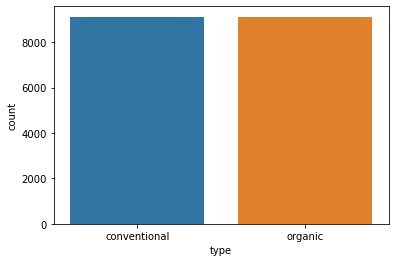

In [17]:
print(df['type'].value_counts())

sns.countplot(df['type'])
plt.show()

In [18]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [19]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

* **Also we can see that we have equal number of counts from each region**

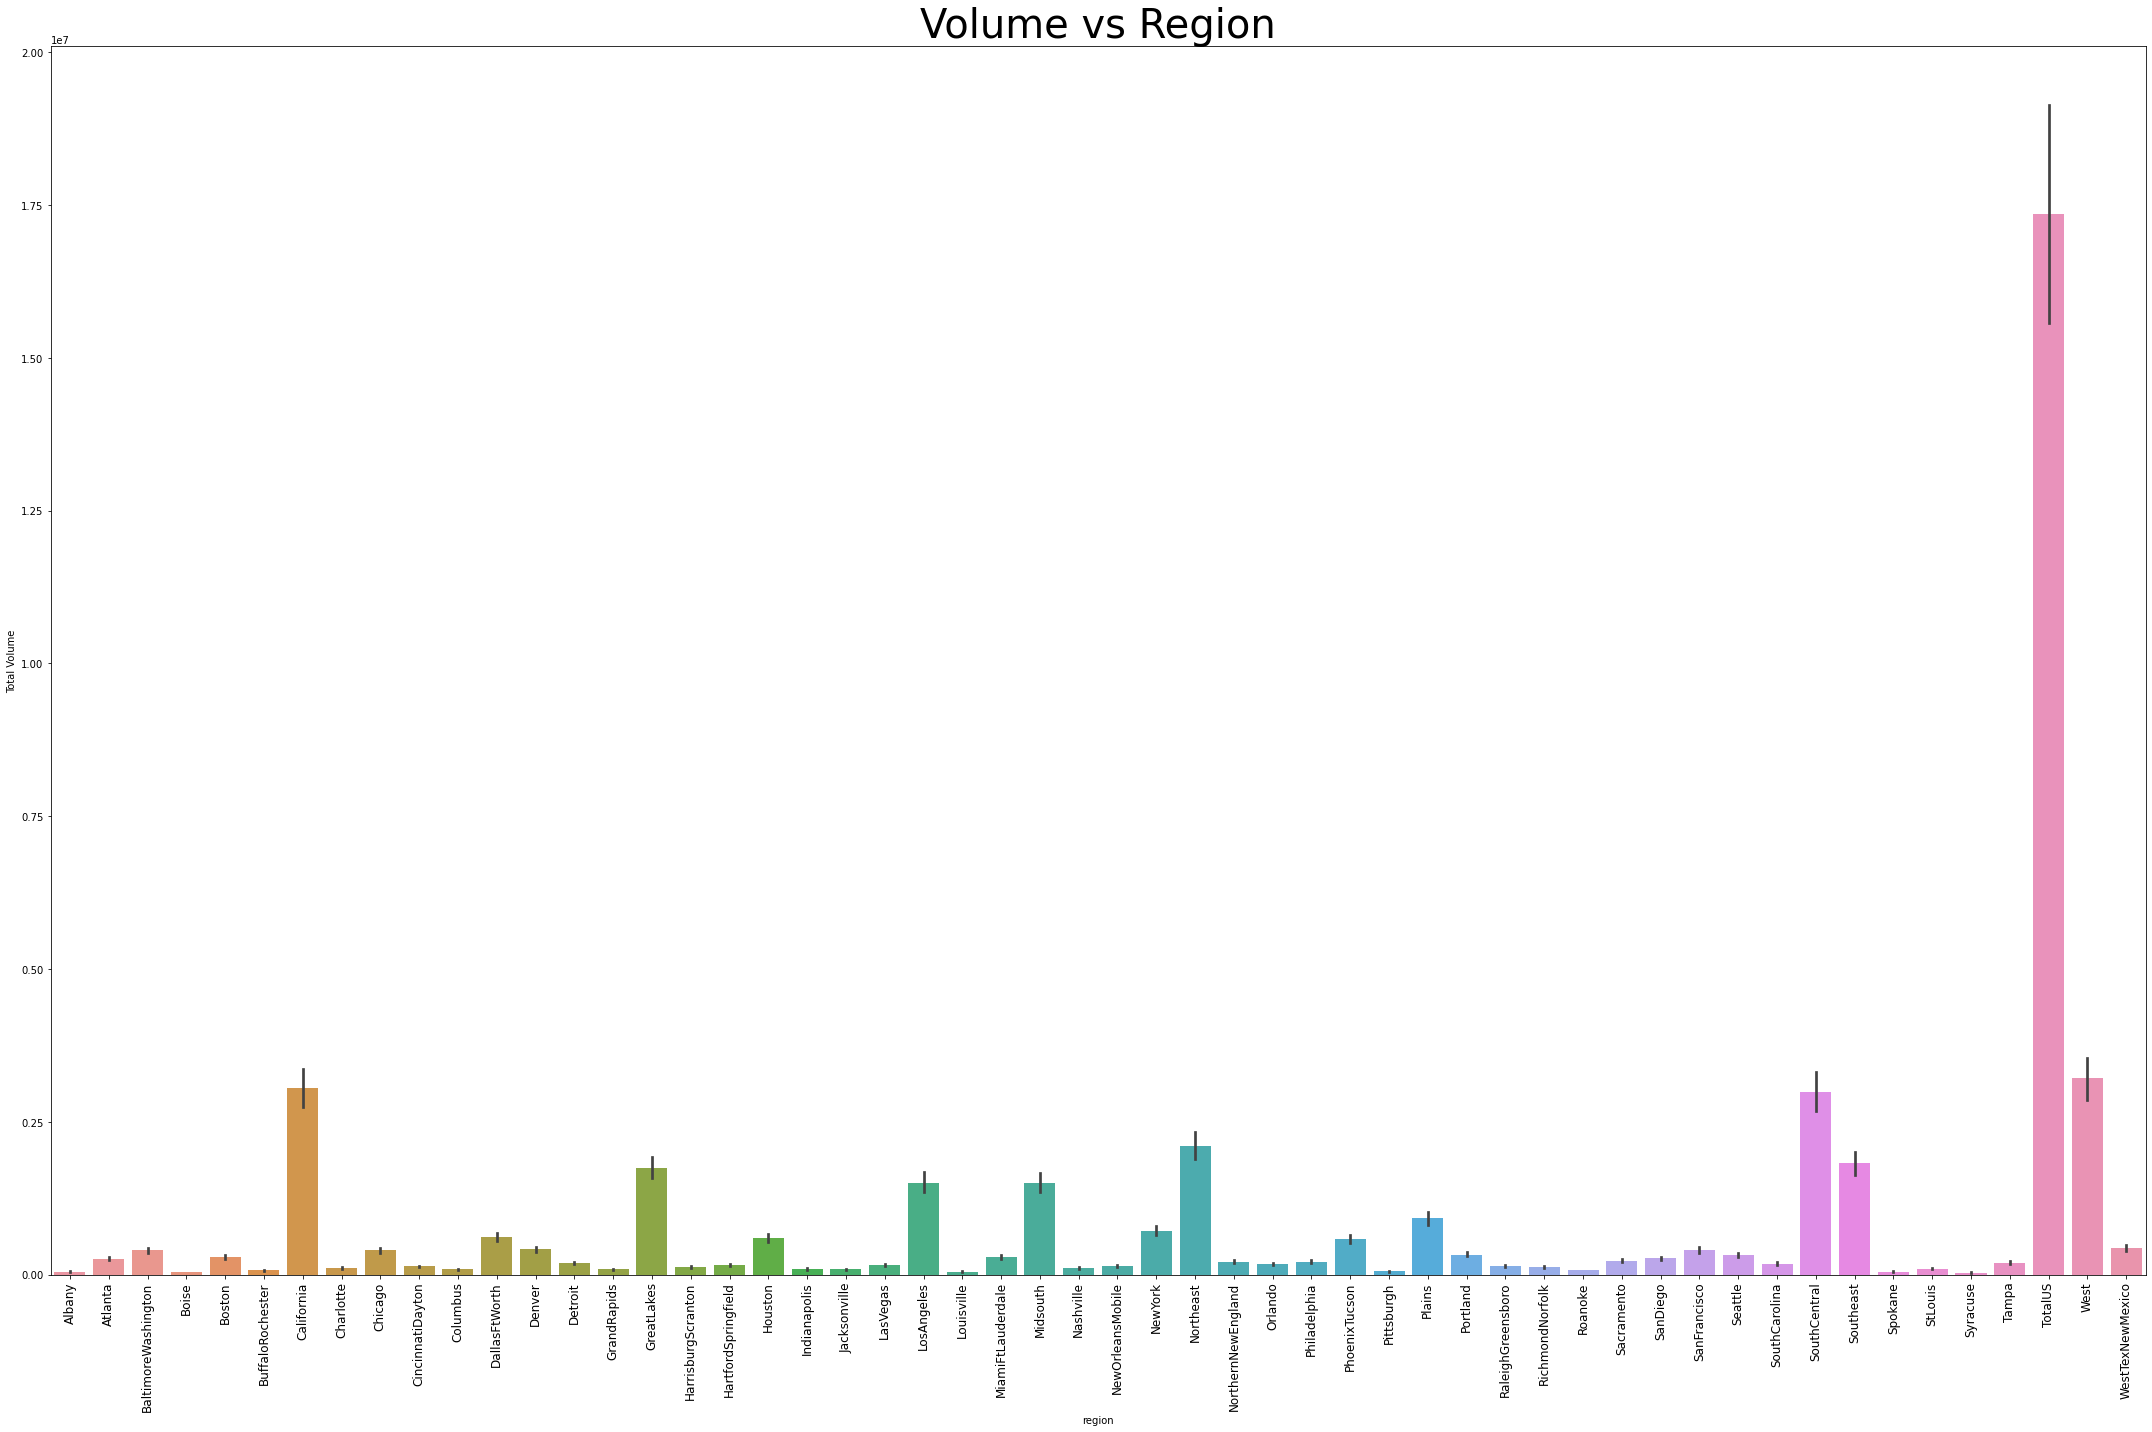

In [20]:
plt.figure(figsize = (30,20),)
sns.barplot(x = 'region', y = 'Total Volume', data = df)
plt.xticks(rotation = 90, size = 12)
plt.title('Volume vs Region', fontsize=40)
plt.tight_layout()

* **In above graph we can see that sales volume is more for regions like California, GreatLakes, LA, Midsouth , Northeast,SouthCentral, Southeast and West.**

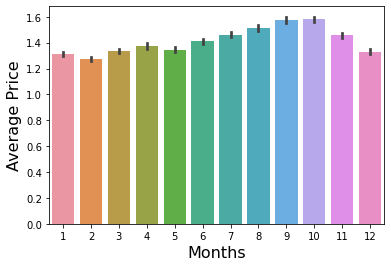

In [21]:
sns.barplot(x = 'Month', y ='AveragePrice',data= df)

plt.xlabel('Months',fontsize=16)
plt.ylabel('Average Price',fontsize=16)
plt.show()

* **We can see in above graph avg price increases from 6 to 10 months and then decreases.**

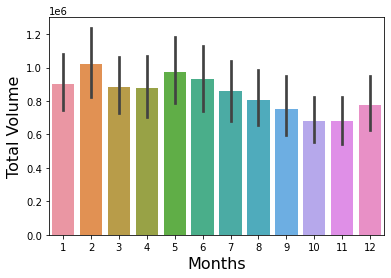

In [22]:
sns.barplot(x = 'Month', y ='Total Volume',data= df)

plt.xlabel('Months',fontsize=16)
plt.ylabel('Total Volume',fontsize=16)
plt.show()

* **In above graph it is clearly seen that sales volume decreses continously from 5th month upto 11th month.**

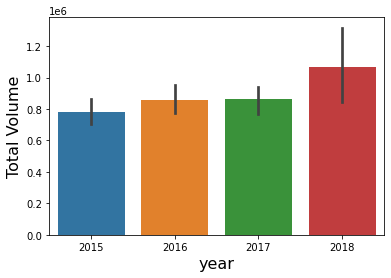

In [23]:
sns.barplot(x = 'year', y ='Total Volume', data = df)
plt.xlabel('year',fontsize=16)
plt.ylabel('Total Volume',fontsize=16)
plt.show()

* **We can see in above graph that sales volume increases from 2015 to 2017 and increases drastically in 2018.**

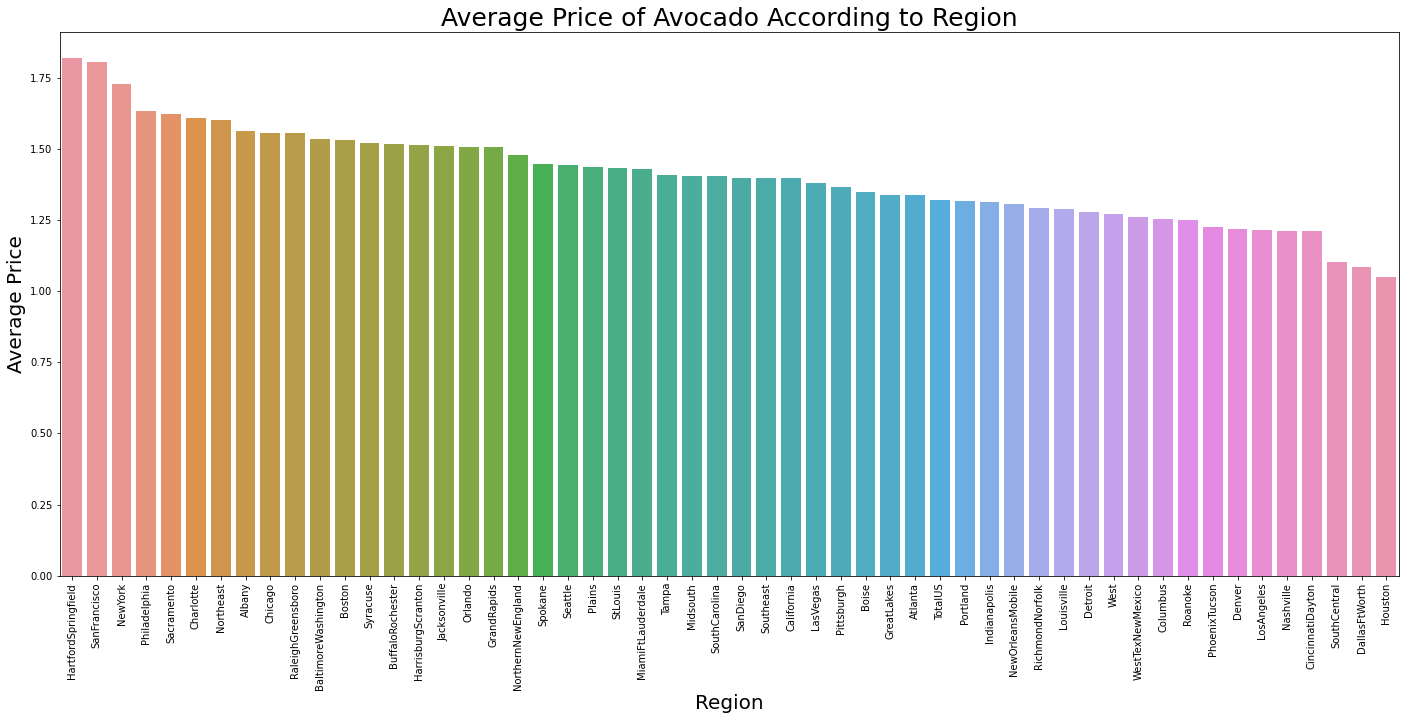

In [24]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region',fontsize=20)
plt.ylabel('Average Price',fontsize=20)
plt.title('Average Price of Avocado According to Region',fontsize=25)
plt.show()

* **In above graph we can see that Avg price is higher in hartfordSpringfield , sanfransico, NewYork, Philadelpia and so on.**
* **Also , Avg price is lower in regions SouthCentral, dallasFtworth, Houston**

In [25]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20


<AxesSubplot:xlabel='4770', ylabel='Total Volume'>

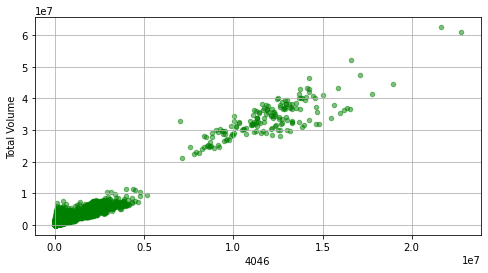

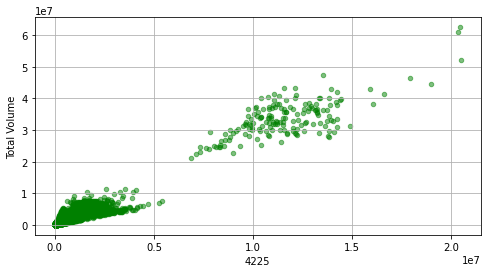

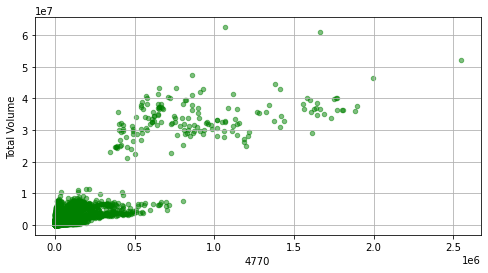

In [26]:
df.plot.scatter(x='4046',y='Total Volume',figsize = (8,4),color='g',alpha =0.5,grid=True)
df.plot.scatter(x='4225',y='Total Volume',figsize = (8,4),color='g',alpha =0.5,grid=True)
df.plot.scatter(x='4770',y='Total Volume',figsize = (8,4),color='g',alpha =0.5,grid=True)

* **Above graphs indicates the total volume sold with respect to the sizes, we can see above size is highly denced between 0 to .5**

<AxesSubplot:xlabel='XLarge Bags', ylabel='Total Bags'>

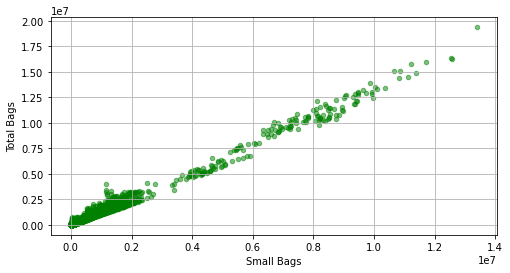

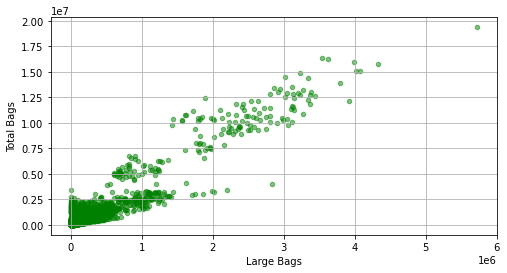

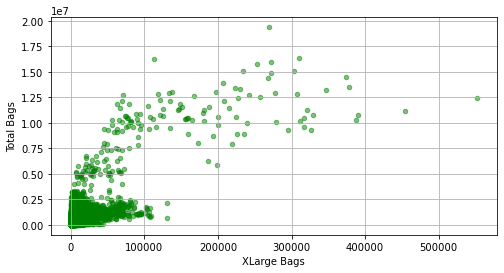

In [27]:
df.plot.scatter(x='Small Bags',y='Total Bags',figsize = (8,4),color='g',alpha =0.5,grid=True)
df.plot.scatter(x='Large Bags',y='Total Bags',figsize = (8,4),color='g',alpha =0.5,grid=True)
df.plot.scatter(x='XLarge Bags',y='Total Bags',figsize = (8,4),color='g',alpha =0.5,grid=True)

* **Above graphs shows strong linear regression between small bags and Total bags and also shows that small, large and xlarge bags are highly correlated with the Total bags column**

In [28]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13


* **Now As we have already splitted date column into day and month and we already have year column in our dataset we can drop Date column**

In [29]:
df.drop('Date', axis=1, inplace = True)

In [30]:
df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


* **Before processing further we need to convert type and region columns into integer , we will use Label encider to encode the columns**

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


* **Now either we have 'int' or 'float' data.**  

In [34]:
# Checking for Skewness

df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [35]:
# dealing with skewed data with the help of POWER TRANSFORM
from sklearn.preprocessing import power_transform
df_new = power_transform(df)

In [36]:
df=pd.DataFrame(df_new, columns=df.columns)

In [37]:
df.skew()

AveragePrice    0.005596
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
Month          -0.146584
Day            -0.208462
dtype: float64

* **We can see skewness get removed from our dataset.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-p

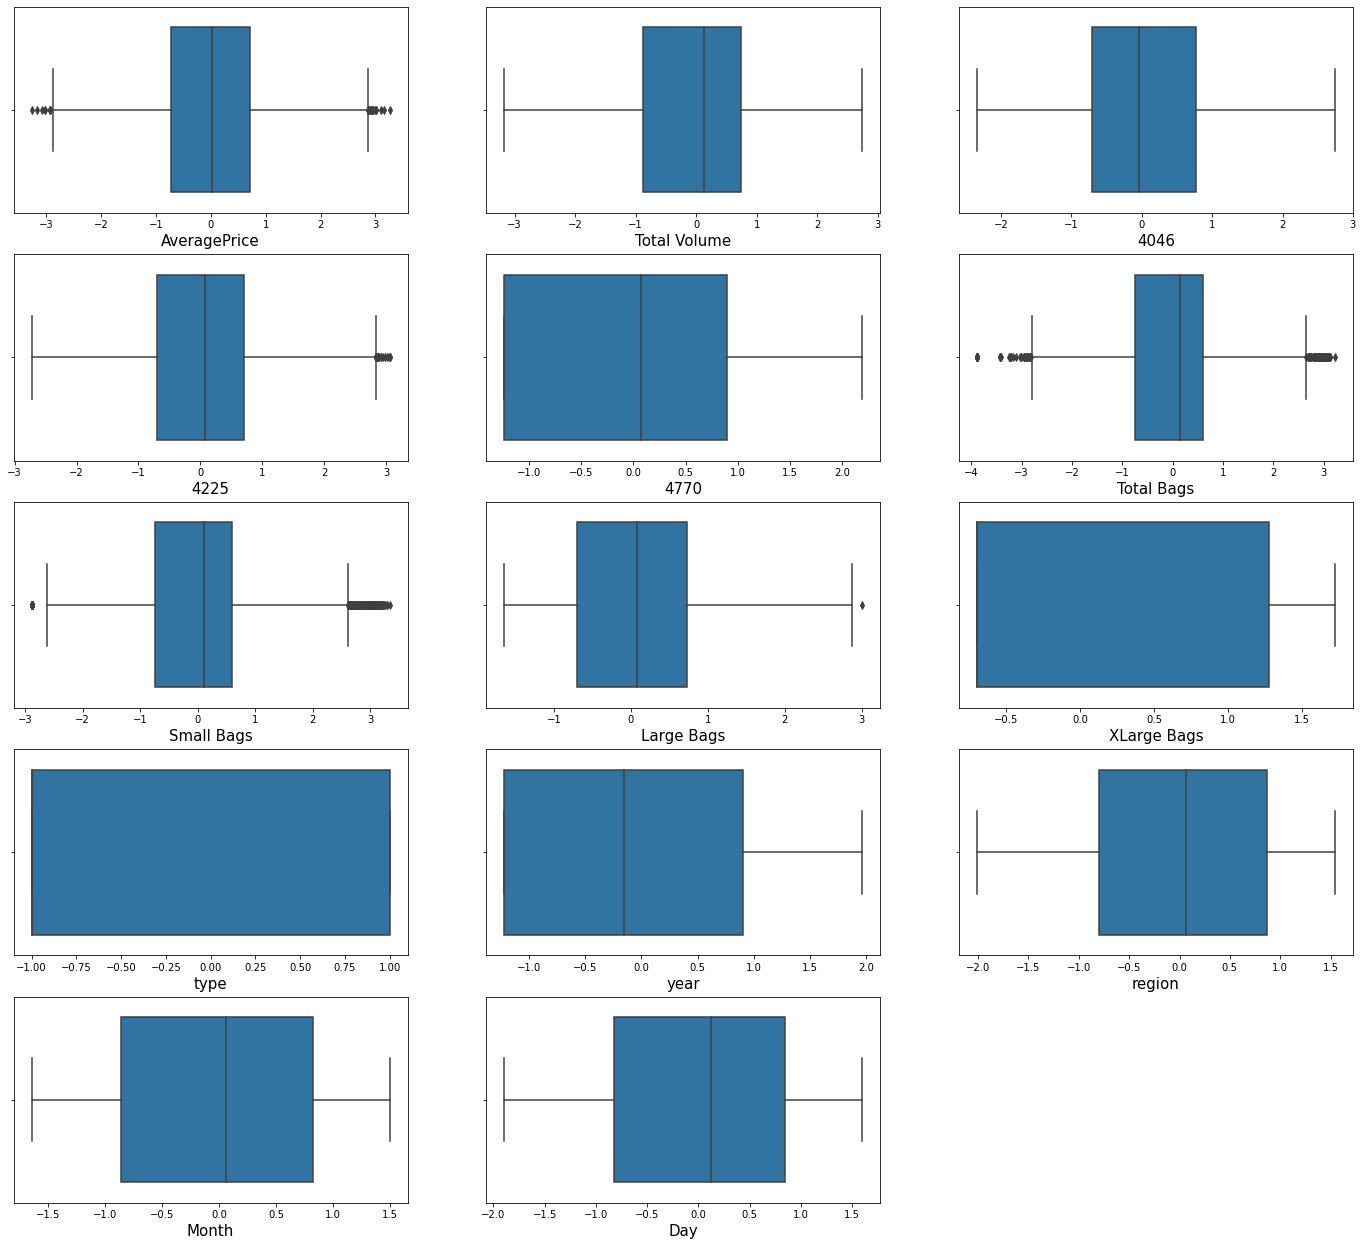

In [38]:
plt.figure(figsize = (24,22))
graph = 1

for column in df:
    if graph <=15:
        ax = plt.subplot(5,3,graph)
        
        sns.boxplot(df[column],orient ='v')
        plt.xlabel(column,fontsize=15)
        
    graph+=1 
    
plt.show()

* **We can see that some of our columns having outliers like [AveragePrice, 4225, TotalBags, SmallBags, LargeBags]. Removing the outliers with Z-score technique**

In [39]:
df.shape

(18249, 14)

In [40]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [41]:
# Importing z-score
from scipy.stats import zscore

In [42]:
z_score = zscore(df[['AveragePrice','Total Bags','Small Bags']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

df= df[filtering_entry]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-p

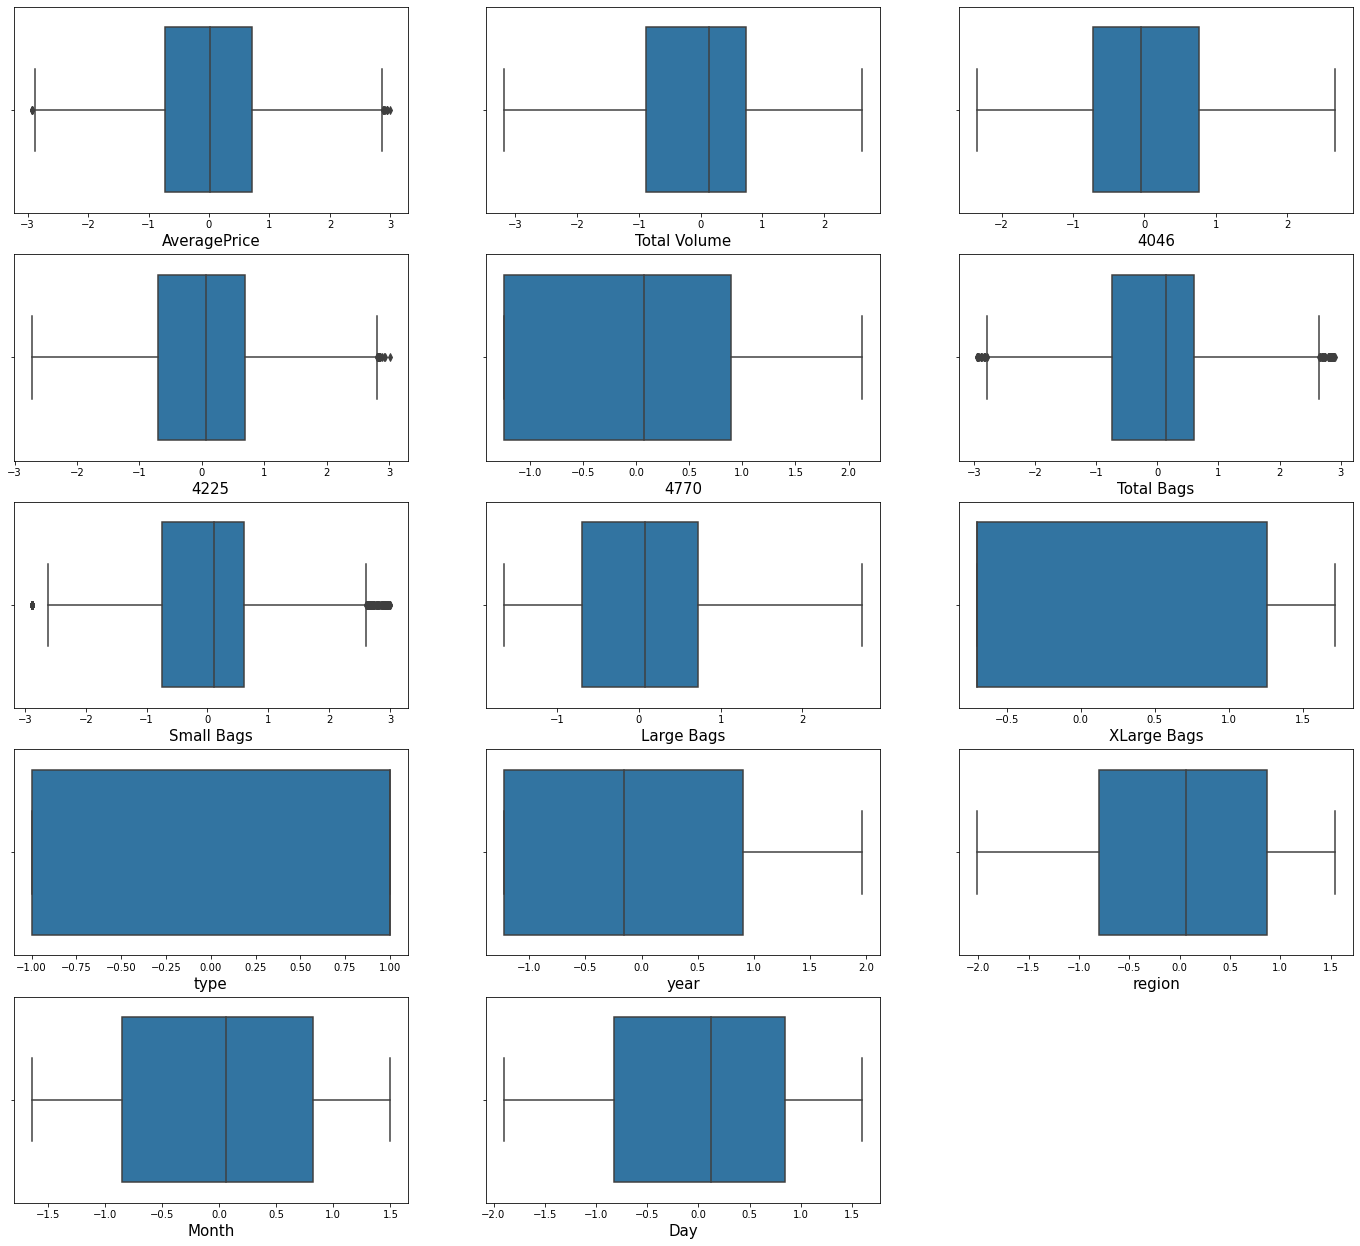

In [43]:
plt.figure(figsize = (24,22))
graph = 1

for column in df:
    if graph <=15:
        ax = plt.subplot(5,3,graph)
        
        sns.boxplot(df[column],orient ='v')
        plt.xlabel(column,fontsize=15)
        
    graph+=1 
    
plt.show()

* **We can see only few outliers now, keeping as it is as not to lose data**

In [44]:
df.shape

(18143, 14)

In [45]:
# Checking data lost

print ('Data lost = ', ((18249-18143)/18249)*100 , '%')

Data lost =  0.5808537454107074 %


# Model Building

## Part- 1
### Building Regression model - Taking Avg price as Target.

In [46]:
df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,-2.011552,1.494347,1.229285
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,-2.011552,1.494347,0.541005
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,-2.011552,1.494347,-0.215570


In [47]:
x = df.drop('AveragePrice', axis = 1 )
y = df['AveragePrice']

In [48]:
# Scaling data with Standard Scalaer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled

array([[-0.07959039, -0.65627901,  0.32033811, ..., -2.00915704,
         1.49161364,  1.22956146],
       [-0.14945334, -0.77565786,  0.243772  , ..., -2.00915704,
         1.49161364,  0.54126568],
       [ 0.18912048, -0.73030626,  0.59576809, ..., -2.00915704,
         1.49161364, -0.21532608],
       ...,
       [-0.77164778, -0.61712115, -0.77232283, ...,  1.55384433,
        -1.64258078,  0.64310459],
       [-0.69745228, -0.54690832, -0.70963245, ...,  1.55384433,
        -1.64258078, -0.10171297],
       [-0.66282636, -0.36279444, -0.78515059, ...,  1.55384433,
        -1.64258078, -0.95462695]])

In [49]:
x = x_scaled

### Linear Regression model

In [50]:
# Importing Linear Regression model for getting best random state 
from sklearn.linear_model import LinearRegression

In [51]:
# Dividing data into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
maxr2 = 0
maxRS=0

for i in range(0,350):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    r2_sc = r2_score(y_test, predf)
    
    if r2_sc>maxr2:
        maxr2=r2_sc
        macRS = i
print('Best R2score=',maxr2, "Random state=",macRS) 

Best R2score= 0.593434451161623 Random state= 313


In [53]:
# Spitting data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=233)

In [54]:
# Going for Linear Regression model
LR = LinearRegression()

LR.fit(x_train,y_train)

LinearRegression()

In [55]:
predf=LR.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc

0.576059763735371

### Building KNN model

In [56]:
# Checking with KNN model
from sklearn.neighbors import KNeighborsRegressor

In [57]:
KN = KNeighborsRegressor()
KN.fit(x_train,y_train)

predf=KN.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc

0.8095610428277551

### DecissionTreeRegressor

In [58]:
# Checking for DecissionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

DT =  DecisionTreeRegressor()

DT.fit(x_train,y_train)

predf=DT.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc

0.766333719921897

### AdaBoostRegressor

In [59]:
# Chacking for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
AD =  AdaBoostRegressor()
AD.fit(x_train,y_train)

predf=AD.predict(x_test)
r2_sc = r2_score(y_test, predf)
r2_sc

0.6098200508572069

* **We can see that KNN is Performing better than rest of the models**

### Going for Hyper_parametr_Tunning with Grid_search_CV:

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {'algorithm': ['kd_tree', 'brute'], 
              'leaf_size' : [10,11,14,15,18,20,25],
              'n_neighbors': [3,5,7,9,11,13],
             }

In [62]:
GScv = GridSearchCV(estimator=KN, param_grid=param_grid)
GScv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [63]:
GScv.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 5}

In [64]:
KNN = KNeighborsRegressor(algorithm = 'kd_tree', leaf_size=10 , n_neighbors=5)

KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

r2_sc = r2_score(y_test, y_pred)
r2_sc

0.8095610428277551

* **Even Through we are getting same r2_score**

In [65]:
print('Mean Absolute Error', mean_absolute_error(y_test,y_pred))
print('Mean Squered Error', mean_squared_error(y_test,y_pred))
print('Root Mean Absolute Error', np.sqrt(mean_absolute_error(y_test,y_pred)))

Mean Absolute Error 0.32483836611540134
Mean Squered Error 0.19390391412552305
Root Mean Absolute Error 0.5699459326246669


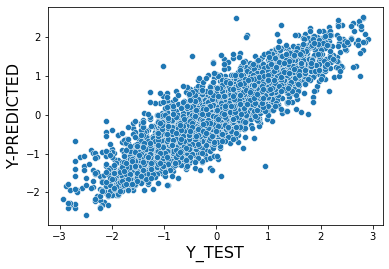

In [66]:
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Y_TEST',fontsize = 16)
plt.ylabel('Y-PREDICTED',fontsize = 16)
plt.show()

In [67]:
# Saving model
import joblib


joblib.dump(KNN,"Avacado_reg")

['Avacado_reg']

## Part- 2
### building Classification model-  Taking Region as Target.

In [68]:
x_new = df.drop('region', axis = 1)
y_new = df['region']

In [69]:
print(x_new.shape)
x_new.head()

(18143, 13)


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,1.494347,1.229285
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,1.494347,0.541005
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,1.494347,-0.215570
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,1.494347,-1.091311
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,1.278438,1.416727


In [70]:
y_new

0       -2.011552
1       -2.011552
2       -2.011552
3       -2.011552
4       -2.011552
           ...   
18244    1.543838
18245    1.543838
18246    1.543838
18247    1.543838
18248    1.543838
Name: region, Length: 18143, dtype: float64

In [71]:
y_new=le.fit_transform(y_new)

In [72]:
# Importing necessry classification models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
scaler = StandardScaler()

scaler.fit_transform

<bound method TransformerMixin.fit_transform of StandardScaler()>

In [74]:
maxAcc = 0
maxRS=0

for i in range(0,350):
    x_new_train,x_new_test,y_new_train,y_new_test = train_test_split(x_new,y_new,test_size=0.20, random_state=i)
    KNN = KNeighborsClassifier()
    KNN.fit(x_new_train,y_new_train)
    predf=KNN.predict(x_new_test)
    acc=accuracy_score(y_new_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy=',maxAcc, "Random state=",macRS)

Best Accuracy= 0.6662992559933866 Random state= 257


In [75]:
x_new_train,x_new_test,y_new_train,y_new_test = train_test_split(x_new,y_new,test_size=0.20, random_state=233)

In [76]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_new_train,y_new_train)

predict_=LR.predict(x_new_test)

print("Accuracy",accuracy_score(y_new_test,predict_)*100)

print(confusion_matrix(y_new_test,predict_))
print(classification_report(y_new_test,predict_))

Accuracy 55.580049600440894
[[41  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  1]
 [ 0  0 44 ...  0  0  1]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  1 70  0]
 [ 0  3  1 ...  0  0 11]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.65        66
           1       0.24      0.37      0.29        67
           2       0.67      0.59      0.63        74
           3       0.41      0.40      0.40        55
           4       0.43      0.44      0.44        59
           5       0.60      0.49      0.54        53
           6       0.79      0.90      0.84        63
           7       0.63      0.70      0.66        77
           8       0.70      0.71      0.70        68
           9       0.69      0.84      0.76        76
          10       0.60      0.46      0.52        78
          11       0.64      0.75      0.69        71
          12       0.49      0.48      0.48        75
          13       0.32      0.30      0.31        56
     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random forest Classisfier:

In [77]:
# Checking with Random forest Classisfier
rf = RandomForestClassifier()

rf.fit(x_new_train,y_new_train)
pred = rf.predict(x_new_test)

print('Accuracy',accuracy_score(y_new_test,pred)*100)
print(confusion_matrix(y_new_test,pred))
print(classification_report(y_new_test,pred))

Accuracy 91.20969964177459
[[61  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  0]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  2  3 ...  0  0 56]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        66
           1       0.79      0.87      0.83        67
           2       0.96      0.99      0.97        74
           3       0.98      0.91      0.94        55
           4       0.87      0.93      0.90        59
           5       0.98      0.85      0.91        53
           6       0.97      1.00      0.98        63
           7       0.93      0.97      0.95        77
           8       0.99      0.97      0.98        68
           9       0.92      0.93      0.93        76
          10       0.87      0.95      0.91        78
          11       0.93      0.96      0.94        71
          12       0.96      0.96      0.96        75
          13       0.85      0.79      0.81        56
      

### Support Vector Classifier (SVC)

In [78]:
# Support Vector Classifier
svc=SVC()

svc.fit(x_new_train,y_new_train)
new_pred = svc.predict(x_new_test)

print('Accuracy',accuracy_score(y_new_test,new_pred)*100)
print(confusion_matrix(y_new_test,new_pred))
print(classification_report(y_new_test,new_pred))

Accuracy 80.0496004408928
[[61  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  0  4 ...  0  0 44]]
              precision    recall  f1-score   support

           0       0.72      0.92      0.81        66
           1       0.49      0.49      0.49        67
           2       0.91      1.00      0.95        74
           3       0.76      0.75      0.75        55
           4       0.79      0.88      0.83        59
           5       0.95      0.68      0.79        53
           6       1.00      0.98      0.99        63
           7       0.75      0.79      0.77        77
           8       1.00      0.96      0.98        68
           9       0.72      0.78      0.75        76
          10       0.72      0.74      0.73        78
          11       0.77      0.96      0.86        71
          12       0.91      0.93      0.92        75
          13       0.55      0.59      0.57        56
       

## Cross Validation Score (CV score)

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
scr = cross_val_score(LR, x_new,y_new, cv=8)
print("Cross validation score for Logistic Regression is", scr.mean())


scr = cross_val_score(rf, x_new,y_new, cv=8)
print("Cross validation score for Random Forest is", scr.mean())


scr = cross_val_score(svc,x_new,y_new, cv=8)
print("Cross validation score for SVC is", scr.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross validation score for Logistic Regression is 0.44855049716467155
Cross validation score for Random Forest is 0.7677850586476156
Cross validation score for SVC is 0.6722679622666756


* **Though it shows that logisctic regression is best performing model it does not have more parameters to tune also there is very less diffrance between support vector and LR model so going for tunning parameters for Support Vector**

## tunning parameters for Support Vector:

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [83]:
grids = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [84]:
grids.fit(x_new_train,y_new_train)

print(grids.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.093 total time= 1.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.056 total time= 1.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.072 total time= 1.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.076 total time= 1.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.069 total time= 1.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.440 total time=  53.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.405 total time=  51.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.424 total time=  52.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.433 total time=  54.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.453 total time=  53.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.046 total time= 1.1min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [85]:
print(grids.best_estimator_)

SVC(C=100, gamma=0.1)


In [86]:
grid_predictions = grids.predict(x_new_test)

In [87]:
print('Accuracy',accuracy_score(y_new_test,grid_predictions)*100)
print(confusion_matrix(y_new_test,grid_predictions))
print(classification_report(y_new_test,grid_predictions))

Accuracy 91.34747864425462
[[57  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  1  1 ...  0  0 55]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        66
           1       0.81      0.78      0.79        67
           2       0.94      1.00      0.97        74
           3       0.89      0.87      0.88        55
           4       0.89      0.95      0.92        59
           5       0.89      0.91      0.90        53
           6       0.98      1.00      0.99        63
           7       0.93      0.96      0.94        77
           8       1.00      0.99      0.99        68
           9       0.96      0.89      0.93        76
          10       0.89      0.90      0.89        78
          11       0.95      0.97      0.96        71
          12       1.00      0.97      0.99        75
          13       0.80      0.80      0.80        56
      

In [88]:
# Saving Model

import joblib


joblib.dump(grids.best_estimator_,"Avacado_class")

['Avacado_class']